## Getting up Vizdoom running 

In [6]:
#VIZDOOM allows developing AI bots that play DOOM using visual information

In [2]:
# Import vizdoom for game env
from vizdoom import *                          #import all vizdoom dependency
# Import random for action sampling
import random
# Import time for sleeping
import time 
# Import numpy for identity matrix
import numpy as np

## Setting up the game

In [101]:
game =DoomGame()       #creating an instance from vizdoom class
game.load_config('github/VizDoom/scenarios/basic.cfg')      #this config allows to load owr reward,buttons etc
game.init()            #stariting it up

In [64]:
#set of actions we can take in the environment
actions=np.identity(3,dtype=np.uint8)

In [84]:
random.choice(actions)


array([0, 1, 0], dtype=uint8)

In [91]:
# Loop through episodes 
episodes = 10 
for episode in range(episodes): 
    # Create a new episode or game 
    game.new_episode()
    # Check the game isn't done 
    while not game.is_episode_finished(): 
        # Get the game state 
        state = game.get_state()                       #using get state function of the game instance
        # Get the game image 
        img = state.screen_buffer
        # Get the game variables - ammo
        info = state.game_variables
        # Take an action
        reward = game.make_action(random.choice(actions),4)    #4 as we want to skip 4 frames
        # Print reward 
        print('reward:', reward) 
        time.sleep(0.02)
    print('Result:', game.get_total_reward())
    time.sleep(2)

reward: -4.0
reward: -4.0
reward: 99.0
Result: 91.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: 97.0
Result: -161.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: 99.0
Result: 67.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -4.0
reward: -9.0
reward: -4.0
reward: -4.0
reward: -4

KeyboardInterrupt: 

In [100]:
game.close()

In [102]:
game.new_episode()

In [103]:
state = game.get_state()

In [104]:
 state.screen_buffer                     #gives the image

array([[[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]],

       [[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]],

       [[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]]], dtype=uint8)

In [107]:
info = state.game_variables           #ammo is out state variable

In [108]:
info

array([50.])

In [109]:
game.close()

## Converting it to Gym Environment

In [3]:
# Import environment base class from OpenAI Gym
from gym import Env
# Import gym spaces 
from gym.spaces import Discrete, Box
# Import opencv 
import cv2

In [14]:
class VizDOOMGym(Env):
    #This is the first function that is called when we start the environment
    
    def __init__(self,render=False):
        super().__init__()           #inheriting for Env class
        #set up the game
        self.game =DoomGame()       #creating an instance from vizdoom class
        self.game.load_config('github/VizDoom/scenarios/basic.cfg')      #this config allows to load owr reward,buttons etc
        
        #Render form logic
        if render==False:
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
            
            
        self.game.init()            #stariting it up
        
        #Creating the action and environment space
        self.observation_space=Box(low=0,high=255,shape=(100,160,1),dtype=np.uint8)
        self.action_space=Discrete(3)
     
    #This is how we take a step in an environment
    def step(self,action):
        actions=np.identity(3,dtype=np.uint8)
        reward=self.game.make_action(actions[action],4)
        
        #all other stuff
        if self.game.get_state():
            state=self.game.get_state().screen_buffer               #to avoid error if there is no state at end
            state=self.grayscale(state)
            ammo=self.game.get_state().game_variables[0]
            info = ammo
        else:
            state = np.zeros(self.observation_space.shape)
            info=0
        info = {"info":info}
        
        
        done=self.game.is_episode_finished()
        
        
        return state,reward,done,info
    
    #Defining how to render the environment
    def render():
        pass
    #This is what happens when we restart the game
    def reset(self):
        self.game.new_episode()
        state=self.game.get_state().screen_buffer
        return self.grayscale(state)
    #Grayscalling the image
    
    def grayscale(self, observation):
            
        	gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        	resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        	state = np.reshape(resize, (100,160,1))
        	return state   
    def close(self):
        self.game.close()
        
        
        

In [103]:
env=VizDOOMGym()

In [26]:
env.step

<bound method VizDOOMGym.step of <__main__.VizDOOMGym object at 0x000001C1927724D0>>

In [88]:
state=env.reset()

In [92]:
env.step(1)

(array([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        ...,
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]),
 99.0,
 True,
 0)

In [64]:
state.shape

(100, 160, 1)

## View Environment

In [4]:
from matplotlib import pyplot as plt

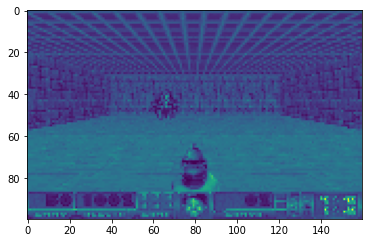

In [30]:
plt.imshow(state)

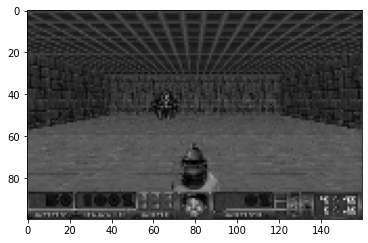

In [31]:
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

In [105]:
env.close()

## Environment checker

In [5]:
from stable_baselines3.common import env_checker

In [111]:
env=VizDOOMGym()

In [112]:
env_checker.check_env(env)             #will show if there is any error in the environment

In [113]:
env.close()

## Setup Callback

In [6]:
import os
from stable_baselines3.common.callbacks import BaseCallback

In [98]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [99]:
CHECKPOINT_DIR = './train/train_basic'
LOG_DIR = './logs/log_basic'

In [100]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

## Train Model 

In [40]:
from stable_baselines3 import PPO

In [124]:
#Creating a non rendered environment
env=VizDOOMGym()

In [130]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=2048)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [131]:
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/log_basic\PPO_6
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 32.6     |
|    ep_rew_mean     | -91.7    |
| time/              |          |
|    fps             | 12       |
|    iterations      | 1        |
|    time_elapsed    | 158      |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 33.9         |
|    ep_rew_mean          | -99.2        |
| time/                   |              |
|    fps                  | 10           |
|    iterations           | 2            |
|    time_elapsed         | 391          |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0069572725 |
|    clip_fraction        | 0.171        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.09        |
|    explained_variance 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.2        |
|    ep_rew_mean          | 20.1        |
| time/                   |             |
|    fps                  | 9           |
|    iterations           | 11          |
|    time_elapsed         | 2427        |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.013984365 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.858      |
|    explained_variance   | 0.759       |
|    learning_rate        | 0.0001      |
|    loss                 | 1.2e+03     |
|    n_updates            | 100         |
|    policy_gradient_loss | 0.000478    |
|    value_loss           | 2.37e+03    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 19.9  

KeyboardInterrupt: 

In [132]:
# check TensorBoard log files for better understansing how the model if prforming

In [138]:
shower_path=os.path.join('Training','Saved Models','Random_saved_state')

In [134]:
model.save(shower_path)

C:\Users\hrith\AppData\Local\Programs\Python\Python310\lib\site-packages\stable_baselines3\common\save_util.py:278: UserWarning: Path 'Training\Saved Models' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


In [135]:
del model

In [136]:
model=PPO.load(shower_path,env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [137]:
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/log_basic\PPO_7
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 11.9     |
|    ep_rew_mean     | 39.7     |
| time/              |          |
|    fps             | 12       |
|    iterations      | 1        |
|    time_elapsed    | 169      |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 20.6        |
|    ep_rew_mean          | -16.5       |
| time/                   |             |
|    fps                  | 9           |
|    iterations           | 2           |
|    time_elapsed         | 409         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.048842534 |
|    clip_fraction        | 0.282       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.748      |
|    explained_variance   | 0.752     

KeyboardInterrupt: 

In [139]:
shower_path=os.path.join('Training','Saved Models','Random_saved_state2')

In [140]:
model.save(shower_path)

## Tests the model

In [11]:
#Import evaluate policy to test agent
from stable_baselines3.common.evaluation import evaluate_policy

In [35]:
#reload model from disc
model=PPO.load('./Training(intermediate models)/Saved Models/Random_saved_state2')

In [36]:
#Create rendered environment
env=VizDOOMGym(render=True)

In [32]:
#evaluate mean reward for 10 games
mean_reward,_=evaluate_policy(model,env,n_eval_episodes=10)

In [33]:
mean_reward

40.1

In [ ]:
env.close()

In [38]:
#Testing using loop
for episode in range(10): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        # time.sleep(0.20)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format( episode,total_reward))
    time.sleep(2)

Total Reward for episode 0 is 60.0
Total Reward for episode 1 is 76.0
Total Reward for episode 2 is 87.0
Total Reward for episode 3 is 95.0
Total Reward for episode 4 is -14.0
Total Reward for episode 5 is 34.0
Total Reward for episode 6 is -14.0
Total Reward for episode 7 is -4.0
Total Reward for episode 8 is 95.0
Total Reward for episode 9 is 95.0


In [39]:
env.close()